**MODEL MULTI LINEAR REGRESSION TERHADAP NILAI EVAPOTRANSPIRASI STASIUN KLIMATOLOGI FLORIDA AMERIKA SERIKAT**

Percobaan ini adalah sebagai pembelajaran bagi saya untuk berlatih machine learning sederhana berupa "supervised machine learning" yaitu linear regression. Berikut merupakan hasil analisa serta script dari regresi linear sederhana untuk portfolio saya menggunakan python.

In [1]:
import pandas as pd
import numpy as np

Tahap 1. Menginputkan Data

In [15]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/00 Belajar Machine Learning/trial_data_et.csv')
dataset

,date,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration
0,40158,61.53,88.8,64.0,0.00,77.2,20.4,0.1,2.17
1,40159,38.42,68.2,41.9,0.00,85.8,NaN,0.1,1.36
2,40160,67.70,153.4,93.3,27.39,84.4,24.2,0.1,2.39
3,40161,61.01,NaN,87.4,28.78,87.9,22.5,0.1,2.15
4,40162,50.24,113.6,63.0,13.19,91.4,21.6,0.1,1.77
5,40163,43.61,87.5,43.6,3.14,91.5,20.7,0.1,1.54
6,40164,40.84,34.4,26.2,0.00,94.6,19.9,0.1,1.44
7,40165,64.81,36.9,19.6,0.00,94.6,20.6,0.2,2.28
8,40166,80.64,179.8,NaN,27.77,NaN,14.9,0.2,2.83
9,40167,56.57,164.2,57.7,15.68,69.3,11.6,0.2,1.98


In [16]:
dataset.duplicated().sum() #cek data ada duplikat
dataset.isna() #cek pada tiap cell, apakah datanya kosong atau NAN

,date,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False


Tahap 2. Men-Cleansing Data

In [17]:
dataset.isna().sum() # menghitung jumlah NA pada tiap kolom

,0
date,0
latent_heat,1
solar_radiation,1
net_radiation,1
sensible_heat_flux,1
relative_humidity,1
air_temperature,2
water_distance,1
evapotranspiration,0


In [22]:
row_raw = len(dataset) #cek jumlah row
row_raw

20

In [28]:
dataset = dataset.dropna() #kalau kita drop nilai NA, maka 1 row akan hilang jika salah satunya ada yang nilainya NA
row_clean = len(dataset) #cek jumlah row setelah cleaning nilai NaN
row_clean

14

In [29]:
dataset.describe() #data umum pada masing-masing variable

,date,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,40167.928571,52.192857,119.735714,56.557143,10.704286,82.792857,17.307143,0.164286,1.834286
std,6.170205,13.099754,47.370871,19.288806,9.025466,8.944914,4.735701,0.049725,0.461348
min,40158.000000,37.420000,34.400000,19.600000,0.000000,69.300000,9.700000,0.100000,1.310000
25%,40163.250000,40.120000,87.825000,45.450000,0.785000,77.125000,13.775000,0.100000,1.410000
50%,40167.500000,49.275000,136.450000,60.100000,13.150000,82.800000,19.500000,0.200000,1.735000
75%,40172.750000,61.412500,152.775000,65.950000,17.570000,90.975000,20.675000,0.200000,2.165000
max,40177.000000,79.410000,185.800000,93.300000,27.390000,94.600000,24.200000,0.200000,2.780000


Tahap 3. Memisahkan data antara Features & Target
(Pada kasus ini, Target adalah evapotranspiration)

In [92]:
features = dataset.drop(columns=['evapotranspiration', 'date']) #melakukan pemisahan features
features

,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance
0,61.53,88.8,64.0,0.00,77.2,20.4,0.1
2,67.70,153.4,93.3,27.39,84.4,24.2,0.1
4,50.24,113.6,63.0,13.19,91.4,21.6,0.1
5,43.61,87.5,43.6,3.14,91.5,20.7,0.1
6,40.84,34.4,26.2,0.00,94.6,19.9,0.1
7,64.81,36.9,19.6,0.00,94.6,20.6,0.2
9,56.57,164.2,57.7,15.68,69.3,11.6,0.2
10,39.59,146.1,58.1,18.49,77.1,10.6,0.2
13,48.31,142.6,75.9,6.38,80.7,19.1,0.2
14,61.06,80.8,45.2,0.00,89.7,21.5,0.2


In [93]:
target = dataset['evapotranspiration'] #melakukan pemisahan target
target

,evapotranspiration
0,2.17
2,2.39
4,1.77
5,1.54
6,1.44
7,2.28
9,1.98
10,1.38
13,1.70
14,2.15


Tahap 3. Melakukan train test split untuk memisahkan data yang akan jadi data_train dan data_uji

In [94]:
from sklearn.model_selection import train_test_split  # import module train test split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(features,target,train_size=0.75,random_state=1) #train size untuk mengatur train sebanyak 80% dan 20% data test, random state untuk memberikan keterangan berapa kali data di random
y_train #data y yang akan dilakukan train

,evapotranspiration
15,1.40
6,1.44
2,2.39
18,1.39
0,2.17
19,1.31
14,2.15
13,1.70
17,2.78
7,2.28


In [96]:
y_test #data y yang sebagai test

,evapotranspiration
5,1.54
10,1.38
9,1.98
4,1.77


Tahap 4. Melakukan pemodelan Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression #import modul Linear Regression

In [98]:
model = LinearRegression() #state model
model.fit(x_train,y_train) # model linear dengan memasukan variabel feature_train dan target_train

LinearRegression()

In [99]:
model.predict(x_test) #melakukan test terhadap nilai feature (x_test)

array([1.53781544, 1.38412004, 1.98442371, 1.76862317])

Tahap 5. Melakukan Evaluasi menggunakan R2 dan RMSE

In [100]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [101]:
#melakukan test r2
r2_score(y_test,model.predict(x_test)) # membandingkan nilai y_test dengan hasil model prediksi (y_real , y_prediction)
# hasil menunjukan nilai 0.99 atau 99% artinya model dapat menjelaskan seluruh variasi data

0.9997913226470377

In [102]:
root_mean_squared_error(y_test,model.predict(x_test)) # membandingkan nilai y_test dengan hasil model prediksi untuk RMSE
# hasil menunjukan nilai 0.004 mm, sehingga model harusnya sangat baik

0.003286786533403821

Additional, Melakukan analisa VIF untuk melihat depedensi antar features

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

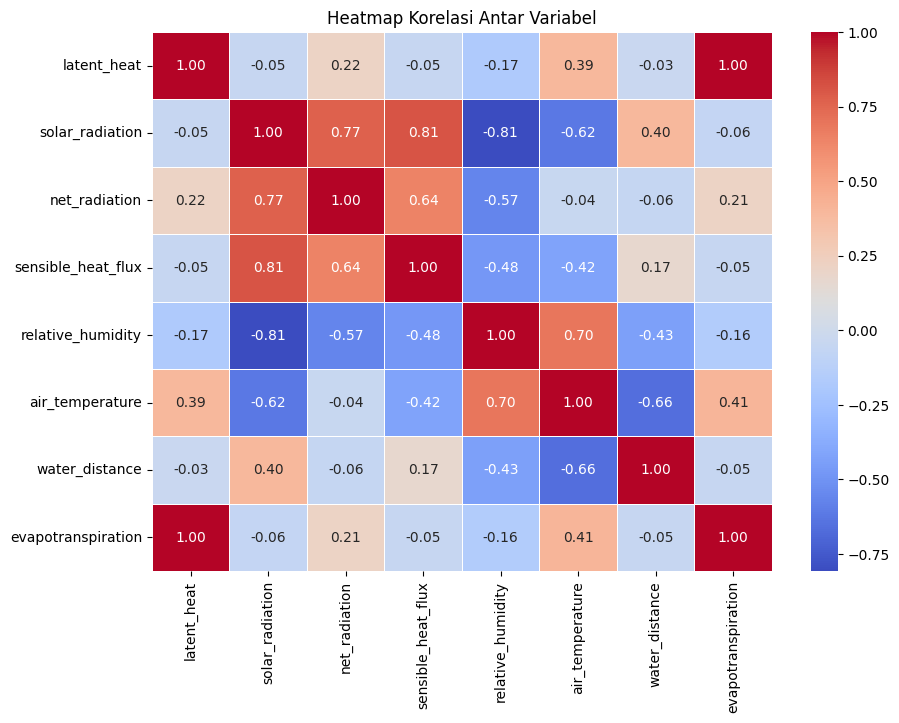

In [105]:
dataset_without_date = dataset.drop(columns=['date'])
plt.figure(figsize=(10,7))
sns.heatmap(dataset_without_date.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Berdasarkan gambar di atas, tampak korelasi yang cukup tinggi antar masing-masing variabel diantaranya
1. net_radiation vs solar_radiation
2. sensible_heat_flux vs solar_radiation
3. sensible_heat_flux vs net_radiation
4. air_temperature vs relative_humidity

Saran yang dapat dilakukan adalah mencoba masing-masing menghilangkan variabel independen tersebut (features) dan melihat perubahan dari hasil model, apakah meningkatkan akurasi atau tidak.

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [118]:
x_vif = add_constant(x_train)
vif_dataset = pd.DataFrame([vif(x_vif.values,i)
                    for i in range(x_vif.shape[1])],
                    index= x_vif.columns).reset_index()
vif_dataset.columns = ['Features','VIF_score']
vif_dataset = vif_dataset.loc[vif_dataset.Features!='const']
vif_dataset

,Features,VIF_score
1,latent_heat,25.414285
2,solar_radiation,207.436721
3,net_radiation,57.798478
4,sensible_heat_flux,46.975778
5,relative_humidity,111.214381
6,air_temperature,72.590954
7,water_distance,20.657386


Dari hasil analisis Multicollinearity, sepertinya varibel pada masing-masing memiliki nilai diatas dari 10, yang dapat diinterpretasikan bahwa dua atau lebih variabel memiliki korelasi yang tinggi antar satu sama lain (multicollinearity parah).

Saran mungkin selanjutnya row data diperbanyak lagi karena ini hanya uji coba Multi Linear Regression sederhana terhadap 20 baris nilai evapotranspirasi di salah satu Stasiun Klimatologi Florida Amerika Serikat.

Sumber data: https://sofia.usgs.gov/exchange/evapotrans/index.php

<br><br>
<a href="www.linkedin.com/in/iqbalfauzanh"><img src="https://img.shields.io/badge/-© 2025 Iqbal Fauzan Herlambang-417DAC?style=for-the-badge&logoColor=white"/></a>